![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# **_Análisis de Segmentación de Pisos mediante Clustering🏡_**

## **_Introducción_**
En este notebook, realizaremos un análisis de clustering para segmentar los pisos en función de sus características y la influencia de su entorno. El objetivo es identificar patrones en el mercado inmobiliario y agrupar propiedades con similitudes en términos de ubicación, tipo de negocios cercanos, acceso a transporte y otras variables relevantes.


## **_Objetivos del análisis_**

Segmentación del mercado inmobiliario: Identificar grupos de pisos con precios y características similares.
Evaluar la influencia del entorno: Analizar cómo la cercanía a diferentes tipos de negocios, transporte público y otros factores afectan los precios de los inmuebles.
Detección de zonas con potencial de valorización: Identificar áreas en crecimiento o con características similares a zonas más caras.
Optimización de estrategias de inversión: Proporcionar información para la toma de decisiones en compra, venta o inversión en bienes raíces.


## **_Metodología_**

##### **_1. Carga y exploración de datos:_**

Revisión de los datos disponibles .
Identificación, tratamiento de valores nulos o inconsistencias, entre otras acciones.

##### **_2. Preprocesamiento de datos:_**

Codificación de variables categóricas como barrio y otras en relacion a negocios y la vivienda .
Normalización de variables numéricas (precios,dormitorios,etc.).

##### **_3. Selección de variables:_**

Elección de las características más relevantes para el análisis.
Análisis de correlación entre características y precio.

-------------------------------------------------------------------------------------------------------------------
**_Los primeros tres pasos fueron realizados en el notebook donde esta el registro del EDA_** 

-------------------------------------------------------------------------------------------------------------------

##### **_4. Aplicación de Clustering:_**

Prueba de diferentes algoritmos de clustering (K-Means, DBSCAN, GMM, etc.).
Selección del número óptimo de clusters (método del codo, silhouette score, etc.).
Evaluación de los resultados y ajuste de parámetros si es necesario.

##### **_5. Análisis e interpretación de clusters:_**

Visualización de los clusters(posiblemente un mapa).
Comparación de los precios y características dentro de cada cluster.
Evaluación del impacto de los negocios, el transporte, entre otras variables en los precios.

##### **_6. Aplicación de clustering en modelos predictivos:_**

Uso de los clusters como una nueva variable en modelos de regresión para mejorar la predicción de precios.
Evaluación del impacto de cada cluster en el precio de los pisos.

**_Conclusión esperada_**

Este análisis proporcionará una segmentación detallada del mercado inmobiliario, ayudando a identificar zonas con potencial de inversión y a entender mejor los factores que influyen en los precios de los inmuebles. Además, permitirá mejorar modelos de predicción de precios al incluir la influencia del entorno en los resultados.



# **_Importacion librerias_**

In [191]:
import pandas as pd 
import numpy as np

# visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import DBSCAN





# **_Lectura de datos_**

In [192]:
df_clustering = pd.read_csv("./data/dfbaseline.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7328\2563219108.py:1: DtypeWarning: Columns (140) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clustering = pd.read_csv("./data/dfbaseline.csv")


# **_Ajustes extras_**

In [193]:
pd.set_option("display.max_columns", None)
# pd.reset_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.reset_option("display.max_rows", None)

# **_Modelado Clustering_**

### **_Seleccion de variables_**



In [194]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Columns: 143 entries, Unnamed: 0 to total_estaciones
dtypes: float64(26), int64(99), object(18)
memory usage: 10.9+ MB


In [195]:
# Eliminamos las columnnas antes de pasar a los modelos
df_clustering = df_clustering.drop(columns=["web"])
df_clustering = df_clustering.drop(columns=["url"])

# # Eliminamos columna desconocida
df_clustering = df_clustering.drop(columns=["Unnamed: 0"])

# # ELiminamos columna con muchos valores nulos 
# df_clustering = df_clustering.drop(columns=["gastos_comunidad"])
# df_clustering = df_clustering.drop(columns = ["tipo_garaje"])

# # Reemplazo de valores nulos 
# df_clustering["estado_agr"] = df_clustering["estado_agr"].fillna("desconocido")


In [196]:
df_clustering.describe()

,m2_constr,cod_distrito,cod_barrio,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,tiene_armario,cancha_tenis,chimenea,exterior,interior,porton_electrico,videoportero,precio,armarios,codigo_postal,m2_utiles,certificado_energetico,puerta_seguridad,portero,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,num_personas,num_personas_hombres,num_personas_mujeres,total_transacciones,viv_nuevas_transacciones,viv_usadas_transacciones,lineas_metro,num_lineas_buses,renta_neta_media_por_persona,renta_neta_media_por_hogar,mediana_de_la_renta_por_unidad_de_consumo,renta_bruta_media_por_persona,renta_bruta_media_por_hogar,habitantes,hogares,tamaño_del_hogar_(nº_de_personas_en_la_vivienda),hog_con_1,hog_con_2,hog_con_3,hog_con_4,hog_con_5,hog_con_6,hog_con_7,hog_con_8,hog_con_9,hog_con_10,hog_con_11,hog_con_12,hog_con_13,hog_con_14,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,cocina_sin_informacion,cocina_reformada,cocina_sin_reformar,cocina_amueblada,cocina_sin_amueblar,cocina_equipada,cocina_independiente,cocina_abierta,jardin_n,piscina_n,ascensor_es_imputado,balcon_es_imputado,terraza_es_imputado,trastero_es_imputado,chimenea_es_imputado,tiene_jardin_es_imputado,tiene_piscina_es_imputado,cancha_tenis_es_imputado,tiene_armario_es_imputado,porton_electrico_es_imputado,videoportero_es_imputado,puerta_seguridad_es_imputado,num_lineas_buses_es_imputado,estaciones_cercanias_es_imputado,estaciones_metroligero_es_imputado,porc,eficiencia_carpinteria,tipologia_agr_Atico,tipologia_agr_Casa,tipologia_agr_Chalet,tipologia_agr_Duplex,tipologia_agr_Estudio,tipologia_agr_Piso,estado_A Estrenar,estado_A Reformar,estado_Buen Estado,estado_Buen estado,estado_Bueno / Habitable,estado_Depende Del Precio,estado_Desconocido,estado_En Buen Estado,estado_Nuevo / En Construcción,estado_Obra Nueva,estado_Obra nueva,estado_Para Reformar,estado_Perfecto Estado,estado_Reformado,estado_perfecto estado,estado_reformado,estado_Óptimo / Reformado,antiguedad_Desconocido,antiguedad_Entre 10 y 30 años,antiguedad_Entre 30 y 50 años,antiguedad_Entre 5 y 10 años,antiguedad_Menos de 5 años,antiguedad_Más de 50 años,num_garajes,habitaciones,total_estaciones
count,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.0,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.0,10008.0,10008.0,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000
mean,138.600105,7.770683,81.399181,0.099480,1.540468,2.806455,2.062650,0.082534,0.189349,0.133293,0.440847,1.0,0.000300,0

In [197]:
# Identificar columnas numéricas y categóricas
num_cols = df_clustering.select_dtypes(include=["number"]).columns
cat_cols = df_clustering.select_dtypes(exclude=["number"]).columns

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

Columnas numéricas: Index(['m2_constr', 'cod_distrito', 'cod_barrio', 'amueblado', 'planta',
       'dormitorios', 'banos', 'balcon', 'terraza', 'trastero',
       ...
       'estado_Óptimo / Reformado', 'antiguedad_Desconocido',
       'antiguedad_Entre 10 y 30 años', 'antiguedad_Entre 30 y 50 años',
       'antiguedad_Entre 5 y 10 años', 'antiguedad_Menos de 5 años',
       'antiguedad_Más de 50 años', 'num_garajes', 'habitaciones',
       'total_estaciones'],
      dtype='object', length=124)
Columnas categóricas: Index(['distrito', 'barrio', 'letra_ce', 'tipo_inmueble', 'tipo_suelo',
       'gastos_comunidad', 'tipo_fachada', 'agua_caliente',
       'clasificacion_aire', 'letra_emisiones', 'tipo_calefaccion',
       'energia_calefaccion', 'tamaño_medio_del_hogar', 'm2_areasverdes',
       'estado_agr', 'tipo_garaje'],
      dtype='object')


### **_Codificacion de variables categoricas_**

1. **_One-Hot Encoding (OHE): Para variables con pocos valores únicos._**
2. **_Label Encoding u Ordinal Encoding: Para variables con un posible orden lógico_**
3. **_Target Encoding: Si hay muchas categorías (ej. distrito, barrio), podemos codificarlas según la media del precio._**

In [198]:
# Codificar variables categóricas usando LabelEncoder
df_encoded = df_clustering.copy()
# Aplicamos Label Encoding a las variables con pocas categorías
label_encoder = LabelEncoder()

for col in cat_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# ---------------------------------------------------------------------------------------

# Escalado de datos (todas las variables que sean numéricas)
scaler = StandardScaler()

# Aplicamos el escalado solo a las columnas numéricas
columns_to_scale = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Escalamos los datos
df_scaled = df_encoded.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

### **_Aplicacion de Clustering_**

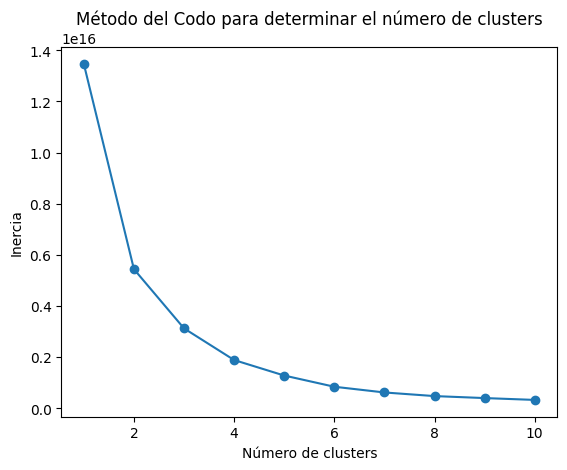

In [199]:
# Definir un rango de posibles valores de k (número de clusters)
inertia = []
k_range = range(1, 11)  # Intentaremos de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering[num_cols])
    inertia.append(kmeans.inertia_)

# Graficar la curva de codo
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para determinar el número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

In [200]:
# Definir el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering[num_cols])

# Mostrar los resultados
print(df_clustering.head())

   m2_constr   distrito  cod_distrito          barrio  cod_barrio  \
0      100.0  Salamanca             4       Recoletos          41   
1       74.0  Chamartín             5  Hispanoamérica          54   
2       76.0  Chamartín             5  Hispanoamérica          54   
3       80.0  Chamartín             5  Hispanoamérica          54   
4       76.0  Chamartín             5  Hispanoamérica          54   

      letra_ce  amueblado  planta  dormitorios  banos  balcon  terraza  \
0          2.0        0.1     1.0            1      1       1        1   
1  Desconocido        0.0     7.0            1      1       0        0   
2          3.0        0.0     6.0            1      1       0        0   
3  Desconocido        0.0     8.0            2      1       0        0   
4  Desconocido        1.0     6.0            1      1       0        0   

   trastero  ascensor tipo_inmueble  tiene_armario  cancha_tenis  chimenea  \
0         1         1          lujo              1            

In [208]:
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(df_clustering[num_cols])

# # Visualización en 3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=df_clustering['Cluster'], cmap='viridis')
# ax.set_xlabel('Componente 1')
# ax.set_ylabel('Componente 2')
# ax.set_zlabel('Componente 3')
# plt.show()

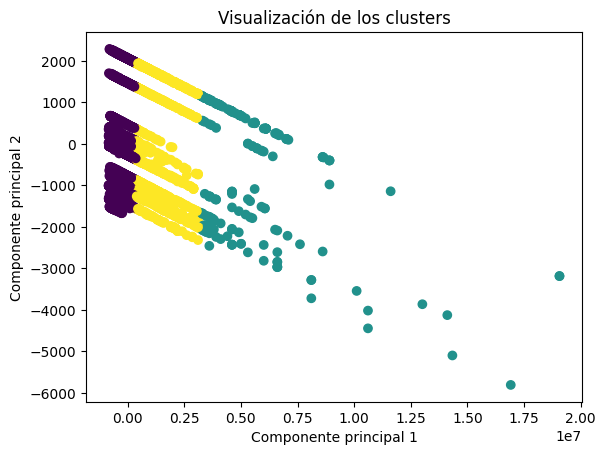

In [202]:

# Reducir las dimensiones a 2 componentes principales para la visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_clustering[num_cols])

# Graficar los clusters en el espacio de 2 dimensiones
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_clustering['Cluster'], cmap='viridis')
plt.title('Visualización de los clusters')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [141]:
# Centroides de los clusters
centroids = kmeans.cluster_centers_
print("Centroides de los clusters:")
print(centroids)

Centroides de los clusters:
[[ 9.54955719e+01  8.46233308e+00  8.84061476e+01  8.49584278e-02
   1.47814311e+00  2.49155959e+00  1.61627614e+00  6.37440161e-02
   1.58730159e-01  1.18039809e-01  4.17737465e-01  1.00000000e+00
   1.68051337e-18  1.88964475e-03  2.57495591e-01  2.77147896e-03
   8.81834215e-04  3.07382212e-02  4.61798229e+05  1.74603175e-01
   2.80236043e+04  7.75610582e+01  1.86444948e-01  9.32224742e-03
   2.04711514e-02  6.04686319e-02  5.07684555e-02  7.52078609e-02
   3.40136054e-02  2.96417002e+01  1.85043642e+01  2.04973292e+01
   3.38156757e+02  4.15441507e+01  2.96721718e+02  4.63882590e+00
   1.88808012e+02  1.97227680e+01  4.68583062e+01  2.34375661e+01
   2.56756197e+01  6.08672777e+01  1.69294282e+02  7.00743490e+01
   2.44037871e+01  1.94630703e+01  1.16091611e+01  8.58189065e+00
   3.26548526e+00  2.89999062e+02  4.17390634e+02  3.19898211e+02
   1.76600907e+02  8.99105568e+01  5.29179894e+01  3.04674981e+01
   1.87543462e+01  9.74930713e+00  3.72514487e+0

In [203]:

# Calcular la silueta para el modelo de clustering
score = silhouette_score(df_clustering[num_cols], df_clustering['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6950804928789378


In [204]:
columns_to_cluster = ['precio', 'comercio_serviciosminoristas', 'cultura_entretenimiento', 
                      'hosteleria_restauracion', 'servicios_profesionales', 'salud_bienestar_educacion']

# Creamos un DataFrame solo con estas columnas
df_cluster = df_scaled[columns_to_cluster]
# Aplicamos KMeans con un número de clusters (por ejemplo 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Agregamos la columna de 'Cluster' al DataFrame original
df_scaled['Cluster'] = df_cluster['Cluster']

# Verificamos el resultado
print(df_scaled[['precio', 'comercio_serviciosminoristas', 'Cluster']].head())

     precio  comercio_serviciosminoristas  Cluster
0  0.956660                      1.781224        1
1 -0.207100                     -0.730980        2
2 -0.207100                     -0.730980        2
3 -0.250203                     -0.730980        2
4 -0.228651                     -0.730980        2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7328\3442110107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7328\3442110107.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_scaled['Cluster'] = df_cluster['Cluster']


In [205]:
sil_score = silhouette_score(df_cluster, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.7120884414629277


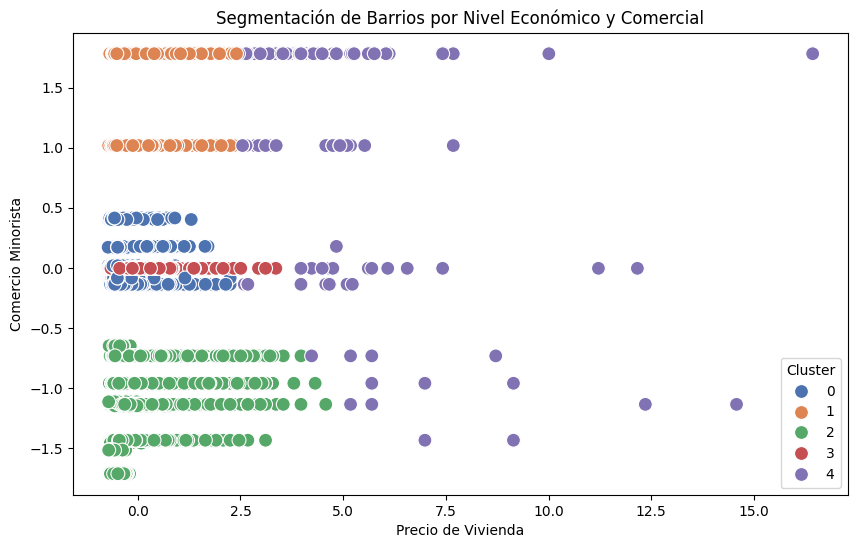

In [206]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precio', y='comercio_serviciosminoristas', hue='Cluster', palette="deep", data=df_scaled, s=100)
plt.title("Segmentación de Barrios por Nivel Económico y Comercial")
plt.xlabel("Precio de Vivienda")
plt.ylabel("Comercio Minorista")
plt.legend(title='Cluster')
plt.show()

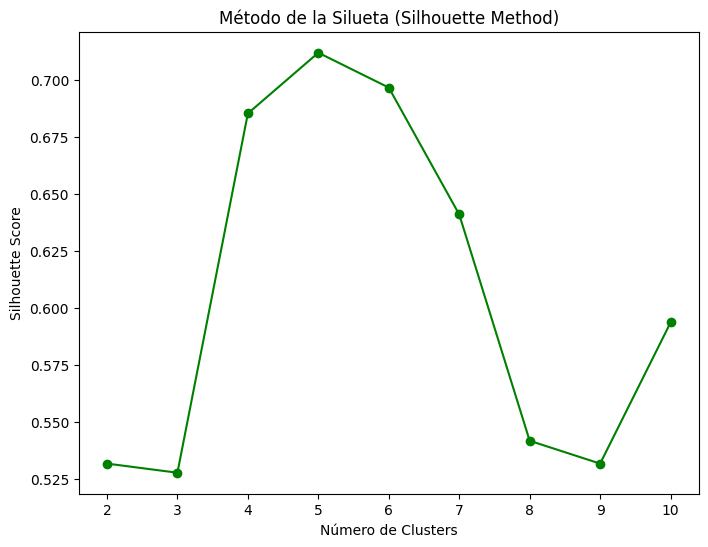

El número óptimo de clusters según el silhouette score es: 5


In [207]:
#  Lista para almacenar el silhouette score
sil_scores = []

# Probar con diferentes números de clusters
for n_clusters in range(2, 11):  # Empezamos en 2, ya que no tiene sentido un solo cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_cluster)
    sil_score = silhouette_score(df_cluster, kmeans.labels_)
    sil_scores.append(sil_score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='-', color='g')
plt.title("Método de la Silueta (Silhouette Method)")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Imprimir el mejor número de clusters según el silhouette score
optimal_clusters = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f"El número óptimo de clusters según el silhouette score es: {optimal_clusters}")

In [150]:
df_scaled.columns

Index(['m2_constr', 'distrito', 'cod_distrito', 'barrio', 'cod_barrio',
       'letra_ce', 'amueblado', 'planta', 'dormitorios', 'banos',
       ...
       'antiguedad_Entre 5 y 10 años', 'antiguedad_Menos de 5 años',
       'antiguedad_Más de 50 años', 'num_garajes', 'tipo_garaje',
       'habitaciones', 'total_estaciones', 'Cluster', 'pca1', 'pca2'],
      dtype='object', length=143)

### **_Analisis e interpretacion de clusters_**

Aplicacion de 

# **_Conclusiones finales_**

Despues de la creacion de los anteriores modelos se llega a la conclusion que el mejor modelo es XXXX con un resultado de XXXX y que gracias a el mismo podemos entender que sucede lo siguiente....